# Model for Diabetes Risk Prediction 

## PIMA Indian Diabetes Dataset 4

 ( Dataset removing missing value rows and outliers)

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('../Dataset/diabetes.csv')

In [163]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [166]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

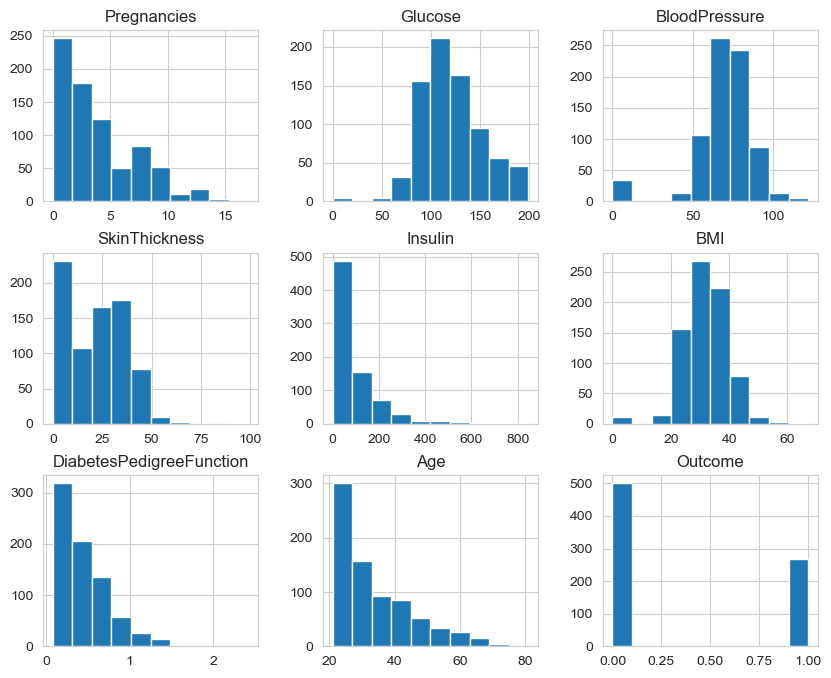

In [167]:
df.hist(bins=10, figsize=(10,8))

In [168]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Replace 'zero' with null

In [169]:
# Copy the first 8 columns
rows_to_impute = df.iloc[:, 1:8].copy()

# Replace zero values with NaN
rows_to_impute.replace(0, np.nan, inplace=True)

# Update df with the processed data
df.iloc[:, 1:8] = rows_to_impute
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_96288/627759142.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1:8] = rows_to_impute
/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_96288/627759142.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1:8] = rows

Drop row that have null

In [170]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [171]:
df = df.dropna()
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [173]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Detect and remove outliers

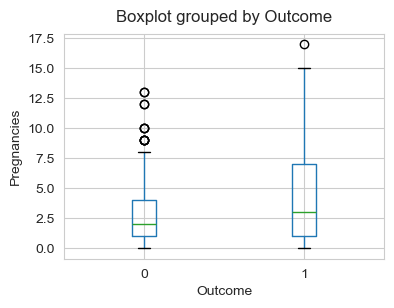

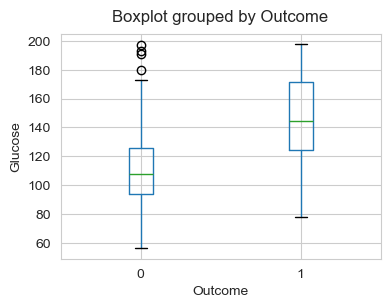

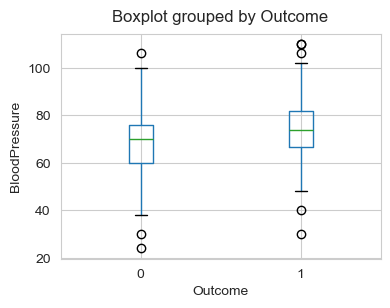

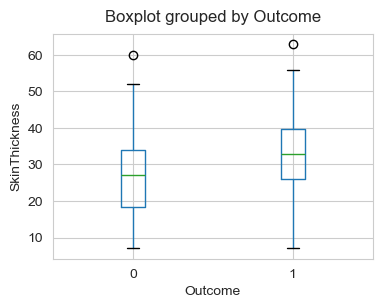

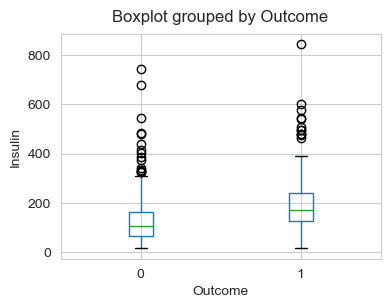

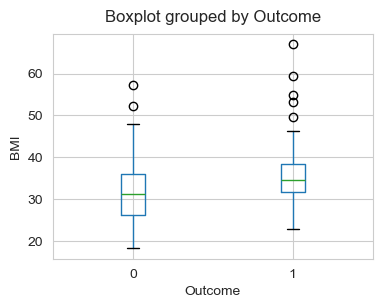

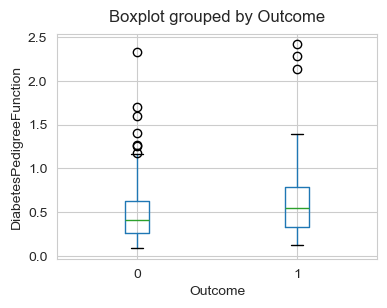

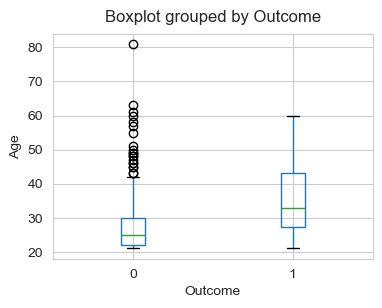

In [174]:
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
  # Create a new figure for each boxplot
  df.boxplot(column=col, by='Outcome', figsize=(4, 3))
  plt.title('')
  plt.xlabel("Outcome")
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

In [175]:
factor = 3  

def remove_outliers(df, factor):
    for column in df.columns:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df

In [176]:
df_cleaned = remove_outliers(df, factor)

(386, 9)
(386, 9)
(381, 9)
(380, 9)
(372, 9)
(370, 9)
(366, 9)
(363, 9)
(363, 9)


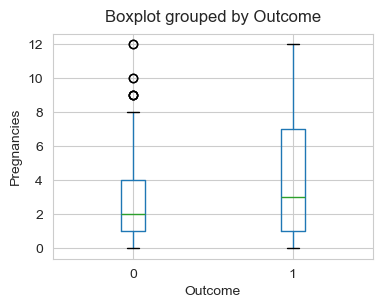

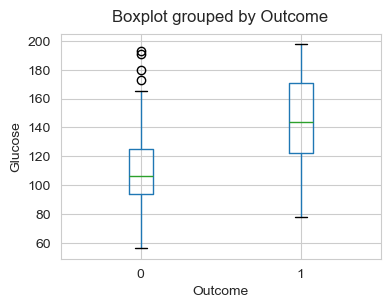

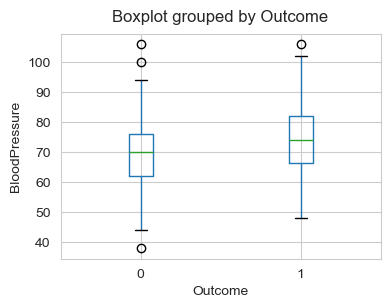

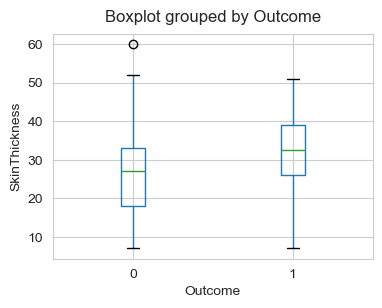

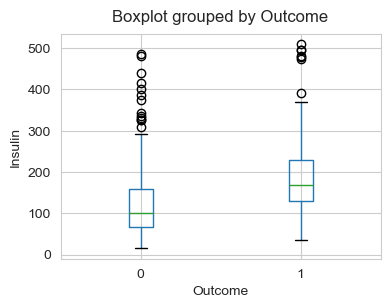

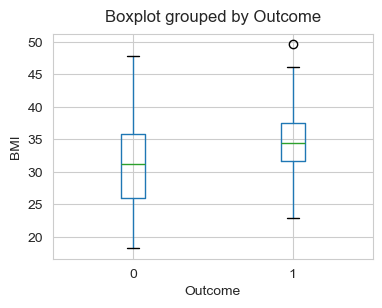

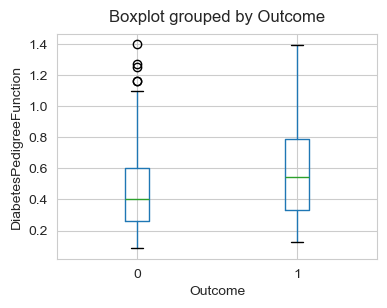

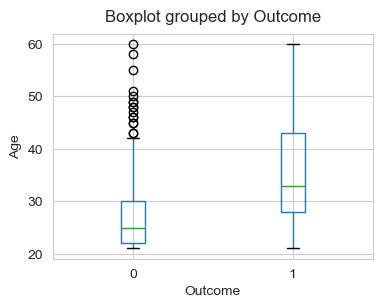

In [177]:
def plot_boxplots(df):
    for col in df.columns[:-1]:
      # Create a new figure for each boxplot
      df.boxplot(column=col, by='Outcome', figsize=(4, 3))
      plt.title('')
      plt.xlabel("Outcome")
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

plot_boxplots(df_cleaned)

In [178]:
df = df_cleaned

In [179]:
df.shape

(363, 9)

In [180]:
df['Outcome'].value_counts()

Outcome
0    249
1    114
Name: count, dtype: int64

Split Data 80:20

In [181]:
x = df.iloc[:,0:8] #select all rows, select columns 0 to 8
y = df['Outcome']

In [182]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32


In [183]:
y.sample(5)

56     1
373    0
191    0
285    0
206    1
Name: Outcome, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [185]:
X_train.shape

(290, 8)

In [186]:
y_train.shape

(290,)

In [187]:
x_test.shape

(73, 8)

In [188]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
x_test = stand.transform(x_test)

Random Forest

In [189]:
parameters ={
      'criterion' : ['gini', 'entropy'],
      'max_features': ['sqrt'],
      'random_state': range(1, 51, 5),
      'min_samples_leaf': range(1, 51, 5),
      'n_estimators': range(1, 51, 5)}

In [190]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Access the best model's cross-validation accuracy
best_score = rf_classifier.best_score_

print("Best Score (K-Fold CV):", best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Score (K-Fold CV): 0.7390350877192982
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 41, 'n_estimators': 1, 'random_state': 46}
CPU times: user 11.4 s, sys: 1.36 s, total: 12.7 s
Wall time: 5min 38s


/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [191]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)

In [192]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(cm)

[[40  5]
 [19  9]]


In [193]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='recall')
avg_score = score.mean()
stdev = stdev(score)

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [194]:
ndf = [(recall, precision, f1, accuracy, avg_score, stdev)]

rf_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation'])
rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters')
rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
0,Tuning hyperparameters,0.321429,0.642857,0.428571,0.671233,0.351667,0.278912


SMOTE to help imbalance data

In [195]:
from imblearn.over_sampling import SMOTE
(X_sample, y_sample) = train_test_split(df, test_size=0.2, stratify = y)

X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
x_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [196]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [197]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Access the best model's cross-validation accuracy
smote_best_score = rf_classifier.best_score_

# Print the best accuracy
print("Best Score (K-Fold CV):", smote_best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

Best Score (K-Fold CV): 0.8755538593792765
Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 31, 'random_state': 46}
CPU times: user 4.53 s, sys: 468 ms, total: 4.99 s
Wall time: 2min 13s


/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [198]:
# Make predictions on the test data
y_pred_smote = best_model.predict(x_test_smote)

In [199]:
cm = confusion_matrix(y_test_smote, y_pred_smote)
smote_accuracy = accuracy_score(y_test_smote, y_pred_smote)
smote_precision = precision_score(y_test_smote, y_pred_smote)
smote_recall = recall_score(y_test_smote, y_pred_smote)
smote_f1 = f1_score(y_test_smote, y_pred_smote)

print(cm)

[[40 10]
 [ 7 16]]


In [200]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score2 = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=kf, scoring='recall')
smote_avg_score = score2.mean()
smote_stdev = stdev(score2)

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [201]:
ndf2 = [(smote_recall, smote_precision, smote_f1, smote_accuracy, smote_avg_score, smote_stdev)]

smote_rf_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation'])
smote_rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters with SMOTE')
smote_rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
0,Tuning hyperparameters with SMOTE,0.695652,0.615385,0.653061,0.767123,0.78217,0.103858


Result comparison

In [202]:
predictions = pd.concat([rf_score, smote_rf_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation
1,Tuning hyperparameters with SMOTE,0.695652,0.615385,0.653061,0.767123,0.782170,0.103858
0,Tuning hyperparameters,0.321429,0.642857,0.428571,0.671233,0.351667,0.278912
